# Import packages

In [122]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Lasso
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

## Get the Data

In [2]:
df = pd.read_csv('yellow_tripdata_2021-03.csv') # Load tha dataset
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2021-03-01 00:22:02,2021-03-01 00:23:22,1.0,0.00,1.0,N,264,264,2.0,3.00,0.50,0.5,0.00,0.00,0.3,4.30,0.0
1,2.0,2021-03-01 00:24:48,2021-03-01 00:24:56,1.0,0.00,1.0,N,152,152,2.0,2.50,0.50,0.5,0.00,0.00,0.3,3.80,0.0
2,2.0,2021-03-01 00:25:17,2021-03-01 00:31:01,1.0,0.00,1.0,N,152,152,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
3,1.0,2021-03-01 00:07:40,2021-03-01 00:31:23,0.0,16.50,4.0,N,138,265,1.0,51.00,0.50,0.5,11.65,6.12,0.3,70.07,0.0
4,2.0,2021-03-01 00:02:13,2021-03-01 00:06:01,1.0,1.13,1.0,N,68,264,1.0,5.50,0.50,0.5,1.86,0.00,0.3,11.16,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925147,NaN,2021-03-29 12:39:29,2021-03-29 13:06:30,NaN,13.18,NaN,NaN,135,75,NaN,34.76,2.75,0.5,0.00,6.12,0.3,44.43,0.0
1925148,NaN,2021-03-29 12:11:00,2021-03-29 12:28:00,NaN,2.60,NaN,NaN,107,163,NaN,18.34,2.75,0.5,0.00,0.00,0.3,21.89,0.0
1925149,NaN,2021-03-29 12:50:00,2021-03-29 13:14:00,NaN,5.50,NaN,NaN,137,17,NaN,37.76,2.75,0.5,0.00,0.00,0.3,41.31,0.0
1925150,NaN,2021-03-29 12:12:00,2021-03-29 12:32:00,NaN,3.78,NaN,NaN,177,85,NaN,-1.55,2.75,0.5,0.00,23.50,0.3,25.50,0.0


### Take a Quick Look at the Data Structure

In [3]:
df.shape

(1925152, 18)

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,2.0,2021-03-01 00:22:02,2021-03-01 00:23:22,1.0,0.00,1.0,N,264,264,2.0,3.0,0.5,0.5,0.00,0.00,0.3,4.30,0.0
1,2.0,2021-03-01 00:24:48,2021-03-01 00:24:56,1.0,0.00,1.0,N,152,152,2.0,2.5,0.5,0.5,0.00,0.00,0.3,3.80,0.0
2,2.0,2021-03-01 00:25:17,2021-03-01 00:31:01,1.0,0.00,1.0,N,152,152,2.0,3.5,0.5,0.5,0.00,0.00,0.3,4.80,0.0
3,1.0,2021-03-01 00:07:40,2021-03-01 00:31:23,0.0,16.50,4.0,N,138,265,1.0,51.0,0.5,0.5,11.65,6.12,0.3,70.07,0.0
4,2.0,2021-03-01 00:02:13,2021-03-01 00:06:01,1.0,1.13,1.0,N,68,264,1.0,5.5,0.5,0.5,1.86,0.00,0.3,11.16,2.5


In [6]:
df.tail(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1925147,NaN,2021-03-29 12:39:29,2021-03-29 13:06:30,NaN,13.18,NaN,NaN,135,75,NaN,34.76,2.75,0.5,0.0,6.12,0.3,44.43,0.0
1925148,NaN,2021-03-29 12:11:00,2021-03-29 12:28:00,NaN,2.60,NaN,NaN,107,163,NaN,18.34,2.75,0.5,0.0,0.00,0.3,21.89,0.0
1925149,NaN,2021-03-29 12:50:00,2021-03-29 13:14:00,NaN,5.50,NaN,NaN,137,17,NaN,37.76,2.75,0.5,0.0,0.00,0.3,41.31,0.0
1925150,NaN,2021-03-29 12:12:00,2021-03-29 12:32:00,NaN,3.78,NaN,NaN,177,85,NaN,-1.55,2.75,0.5,0.0,23.50,0.3,25.50,0.0
1925151,NaN,2021-03-29 12:31:00,2021-03-29 13:03:00,NaN,11.46,NaN,NaN,216,217,NaN,48.85,2.75,0.5,0.0,0.00,0.3,52.40,0.0


In [4]:
df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
904955,2.0,2021-03-17 08:46:09,2021-03-17 09:04:02,1.0,2.97,1.0,N,263,161,1.0,13.50,0.00,0.5,3.36,0.0,0.3,20.16,2.5
1055711,2.0,2021-03-19 12:12:58,2021-03-19 12:23:17,1.0,1.49,1.0,N,43,237,1.0,8.50,0.00,0.5,2.36,0.0,0.3,14.16,2.5
1855124,NaN,2021-03-18 12:59:00,2021-03-18 13:22:00,NaN,2.94,NaN,NaN,189,71,NaN,20.87,2.75,0.5,0.00,0.0,0.3,24.42,0.0
209420,2.0,2021-03-04 17:03:22,2021-03-04 17:10:57,2.0,1.40,1.0,N,41,43,1.0,7.50,1.00,0.5,1.00,0.0,0.3,10.30,0.0
523806,2.0,2021-03-10 15:15:09,2021-03-10 15:23:47,3.0,1.29,1.0,N,238,236,1.0,7.50,0.00,0.5,1.62,0.0,0.3,12.42,2.5


In [7]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,1.797232e+06,1.797232e+06,1.925152e+06,1.797232e+06,1.925152e+06,1.925152e+06,1.797232e+06,1.925152e+06,1.925152e+06,1.925152e+06,1.925152e+06,1.925152e+06,1.925152e+06,1.925152e+06,1.925152e+06
mean,1.674173e+00,1.401315e+00,4.384299e+00,1.030839e+00,1.662084e+02,1.625376e+02,1.266062e+00,1.238105e+01,1.086310e+00,4.932515e-01,1.944633e+00,2.396388e-01,2.970571e-01,1.791940e+01,2.165006e+00
std,4.686830e-01,1.030909e+00,3.712573e+02,5.334394e-01,6.775840e+01,7.159976e+01,4.833565e-01,2.874213e+02,1.259705e+00,7.520253e-02,2.369401e+00,1.323737e+00,4.145595e-02,2.874835e+02,8.798119e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-4.000000e+02,-5.500000e+00,-5.000000e-01,-7.070000e+01,-2.642000e+01,-3.000000e-01,-4.033000e+02,-2.500000e+00
25%,1.000000e+00,1.000000e+00,1.010000e+00,1.000000e+00,1.250000e+02,1.070000e+02,1.000000e+00,6.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,1.116000e+01,2.500000e+00
50%,2.000000e+00,1.000000e+00,1.710000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,5.000000e-01,5.000000e-01,1.860000e+00,0.000000e+00,3.000000e-01,1.416000e+01,2.500000e+00
75%,2.000000e+00,1.000000e+00,3.040000e+00,1.000000e+00,2.360000e+02,2.360000e+02,2.000000e+00,1.350000e+01,2.500000e+00,5.000000e-01,2.760000e+00,0.000000e+00,3.000000e-01,1.956000e+01,2.500000e+00
max,2.000000e+00,9.000000e+00,1.912901e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,3.984664e+05,8.250000e+00,3.300000e+00,7.000000e+02,2.161200e+02,3.000000e-01,3.984692e+05,3.000000e+00


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925152 entries, 0 to 1925151
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           float64
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
dtypes: float64(13), int64(2), object(3)
memory usage: 264.4+ MB


## Data Splitting

In [9]:
#split the df data for train and test
df_train , df_test = train_test_split(df , test_size=.2, random_state=10)

In [127]:
#split the df_train data for train and valudation
df_train, df_val = train_test_split(df_train, test_size=.25, random_state=5)

## Cleaning Training/ Validation / Test Data 

In [11]:
df_train.shape

(1155090, 18)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155090 entries, 964410 to 36587
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1078366 non-null  float64
 1   tpep_pickup_datetime   1155090 non-null  object 
 2   tpep_dropoff_datetime  1155090 non-null  object 
 3   passenger_count        1078366 non-null  float64
 4   trip_distance          1155090 non-null  float64
 5   RatecodeID             1078366 non-null  float64
 6   store_and_fwd_flag     1078366 non-null  object 
 7   PULocationID           1155090 non-null  int64  
 8   DOLocationID           1155090 non-null  int64  
 9   payment_type           1078366 non-null  float64
 10  fare_amount            1155090 non-null  float64
 11  extra                  1155090 non-null  float64
 12  mta_tax                1155090 non-null  float64
 13  tip_amount             1155090 non-null  float64
 14  tolls_amount   

In [13]:
df_val.shape

(385031, 18)

In [14]:
df_test.shape

(385031, 18)

# Check NULL values Tain / validation / Test 

In [15]:
nulls = df_train.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"] 
nulls

,Missing values
VendorID,76724
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,76724
trip_distance,0
RatecodeID,76724
store_and_fwd_flag,76724
PULocationID,0
DOLocationID,0
payment_type,76724


In [16]:
df_train = df_train.dropna(how ='any')

In [17]:
nulls = df_train.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"] 
nulls

,Missing values
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [18]:
#----------------- df_val ---------------------#

In [19]:
nulls = df_val.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"]
nulls

,Missing values
VendorID,25553
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,25553
trip_distance,0
RatecodeID,25553
store_and_fwd_flag,25553
PULocationID,0
DOLocationID,0
payment_type,25553


In [20]:
df_val = df_val.dropna(how ='any')

In [21]:
nulls = df_val.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"]
nulls

,Missing values
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [22]:
#----------------- df_test ---------------------#

In [23]:
nulls = df_test.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"]
nulls

,Missing values
VendorID,25643
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,25643
trip_distance,0
RatecodeID,25643
store_and_fwd_flag,25643
PULocationID,0
DOLocationID,0
payment_type,25643


In [24]:
df_test = df_test.dropna(how ='any')

In [25]:
nulls = df_test.isnull().sum().to_frame()# (to_frame():Convert Series to DataFrame),(sum():To sum the number of missing values),(isnull()to detect missing values)
nulls.columns = ["Missing values"]
nulls

,Missing values
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
trip_distance,0
RatecodeID,0
store_and_fwd_flag,0
PULocationID,0
DOLocationID,0
payment_type,0


In [41]:
#Check the outlier value
df_train['payment_type'].value_counts() # There is no outlier value 

1.0    807705
2.0    258939
3.0      7175
4.0      4547
Name: payment_type, dtype: int64

In [42]:
#Check the outlier value
df_train['passenger_count'].value_counts()

1.0    814234
2.0    145767
3.0     36033
5.0     27316
0.0     23881
6.0     17782
4.0     13349
7.0         2
9.0         1
8.0         1
Name: passenger_count, dtype: int64

In [43]:
#drop the 0,9,7,8
df_train=df_train.drop(df_train[df_train.passenger_count.values==0].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==9].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==8].index)
df_train=df_train.drop(df_train[df_train.passenger_count.values==7].index)

In [44]:
#After drop outlier 
df_train['passenger_count'].value_counts()

1.0    814234
2.0    145767
3.0     36033
5.0     27316
6.0     17782
4.0     13349
Name: passenger_count, dtype: int64

In [45]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.total_amount.values<=0].index)

In [46]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.trip_distance.values<=0].index)

In [47]:
#drop the negative value 
df_train=df_train.drop(df_train[df_train.fare_amount.values<=0].index)

In [49]:
df_train['fare_amount'].value_counts()

6.00      60655
5.50      59249
6.50      59013
7.00      57101
5.00      54911
          ...  
22.38         1
11.62         1
12.59         1
152.00        1
36.83         1
Name: fare_amount, Length: 648, dtype: int64

#### In this step, it took the hours pick up and days of capture and put them in new columns

In [50]:
##--------------------- train ---------------------## 

In [51]:
df_train['Day'] = pd.to_datetime(df_train['tpep_pickup_datetime']).dt.day

In [52]:
df_train['Hour_pickup'] = pd.to_datetime(df_train['tpep_pickup_datetime']).dt.hour
df_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
964410,2.0,2021-03-17 23:23:57,2021-03-17 23:28:16,1.0,1.92,1.0,N,170,141,1.0,7.0,0.5,0.5,1.50,0.0,0.3,12.30,2.5,17,23
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,N,236,239,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,2.5,28,15
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,N,87,148,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,2.5,26,19
570508,2.0,2021-03-11 12:16:29,2021-03-11 12:31:32,1.0,2.02,1.0,N,186,113,1.0,11.0,0.0,0.5,2.86,0.0,0.3,17.16,2.5,11,12
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,N,50,238,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,2.5,24,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,N,186,113,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,2.5,22,18
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,N,141,231,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,2.5,25,13
1092821,2.0,2021-03-19 20:19:08,2021-03-19 20:26:36,1.0,1.27,1.0,N,186,68,1.0,7.0,0.5,0.5,2.70,0.0,0.3,13.50,2.5,19,20
1629764,1.0,2021-03-29 10:18:41,2021-03-29 10:30:52,1.0,2.60,1.0,N,226,229,2.0,11.5,2.5,0.5,0.00,0.0,0.3,14.80,2.5,29,10


In [53]:
df1_train= df_train.drop(df_train[df_train.Day < 20 ].index)
df1_train

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1602218,1.0,2021-03-28 15:28:23,2021-03-28 15:33:27,3.0,1.10,1.0,N,236,239,1.0,6.0,2.5,0.5,1.00,0.0,0.3,10.30,2.5,28,15
1502881,2.0,2021-03-26 19:42:37,2021-03-26 20:01:13,1.0,2.19,1.0,N,87,148,2.0,13.5,1.0,0.5,0.00,0.0,0.3,17.80,2.5,26,19
1374167,2.0,2021-03-24 19:03:46,2021-03-24 19:13:03,1.0,2.38,1.0,N,50,238,1.0,9.5,1.0,0.5,2.76,0.0,0.3,16.56,2.5,24,19
1398315,2.0,2021-03-25 11:28:54,2021-03-25 11:32:21,1.0,0.86,1.0,N,236,236,1.0,5.0,0.0,0.5,1.66,0.0,0.3,9.96,2.5,25,11
1201170,2.0,2021-03-21 22:19:23,2021-03-21 22:31:40,2.0,2.88,1.0,N,166,239,1.0,12.0,0.5,0.5,3.95,0.0,0.3,19.75,2.5,21,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1118566,2.0,2021-03-20 12:25:12,2021-03-20 12:36:04,1.0,1.83,1.0,N,186,237,1.0,9.0,0.0,0.5,2.46,0.0,0.3,14.76,2.5,20,12
1455407,2.0,2021-03-26 09:19:16,2021-03-26 09:28:55,2.0,1.54,1.0,N,186,161,1.0,8.5,0.0,0.5,2.95,0.0,0.3,14.75,2.5,26,9
1245787,2.0,2021-03-22 18:15:08,2021-03-22 18:22:35,1.0,1.59,1.0,N,186,113,1.0,7.5,1.0,0.5,1.00,0.0,0.3,12.80,2.5,22,18
1409311,1.0,2021-03-25 13:33:35,2021-03-25 13:52:50,1.0,6.70,1.0,N,141,231,1.0,22.5,2.5,0.5,5.15,0.0,0.3,30.95,2.5,25,13


In [54]:
df1_train['Day'] = pd.to_datetime(df_train['tpep_pickup_datetime']).dt.weekday

In [55]:
##----------------------------- val ----------------------##

In [56]:
df_val['Day'] = pd.to_datetime(df_val['tpep_pickup_datetime']).dt.day

In [57]:
df_val['Hour_pickup'] = pd.to_datetime(df_val['tpep_pickup_datetime']).dt.hour
df_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1413855,2.0,2021-03-25 14:27:14,2021-03-25 14:36:50,1.0,1.60,1.0,N,114,87,1.0,8.5,0.0,0.5,2.36,0.00,0.3,14.16,2.5,25,14
421074,1.0,2021-03-08 17:45:05,2021-03-08 18:24:11,1.0,13.00,1.0,N,161,14,1.0,38.5,3.5,0.5,14.65,6.12,0.3,63.57,2.5,8,17
935124,1.0,2021-03-17 15:23:13,2021-03-17 15:35:45,0.0,1.30,1.0,N,186,233,2.0,9.5,2.5,0.5,0.00,0.00,0.3,12.80,2.5,17,15
1704182,2.0,2021-03-30 15:53:17,2021-03-30 16:05:43,1.0,2.21,1.0,N,246,211,1.0,10.0,0.0,0.5,1.00,0.00,0.3,14.30,2.5,30,15
1164784,1.0,2021-03-21 07:40:56,2021-03-21 08:05:24,3.0,14.80,1.0,N,132,165,1.0,41.0,0.0,0.5,8.35,0.00,0.3,50.15,0.0,21,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542040,2.0,2021-03-10 19:02:43,2021-03-10 19:20:26,1.0,7.61,1.0,N,262,13,1.0,23.5,1.0,0.5,5.56,0.00,0.3,33.36,2.5,10,19
71889,2.0,2021-03-02 12:28:09,2021-03-02 12:34:46,1.0,1.36,1.0,N,234,100,1.0,6.5,0.0,0.5,1.96,0.00,0.3,11.76,2.5,2,12
1059358,2.0,2021-03-19 13:09:13,2021-03-19 13:27:06,2.0,3.87,1.0,N,237,249,1.0,15.5,0.0,0.5,3.76,0.00,0.3,22.56,2.5,19,13
188647,2.0,2021-03-04 12:39:06,2021-03-04 12:49:36,1.0,2.03,1.0,N,246,211,1.0,9.0,0.0,0.5,1.23,0.00,0.3,13.53,2.5,4,12


In [58]:
df1_val= df_val.drop(df_val[df_val.Day < 20 ].index)
df1_val

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1413855,2.0,2021-03-25 14:27:14,2021-03-25 14:36:50,1.0,1.60,1.0,N,114,87,1.0,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2.5,25,14
1704182,2.0,2021-03-30 15:53:17,2021-03-30 16:05:43,1.0,2.21,1.0,N,246,211,1.0,10.0,0.0,0.5,1.00,0.0,0.3,14.30,2.5,30,15
1164784,1.0,2021-03-21 07:40:56,2021-03-21 08:05:24,3.0,14.80,1.0,N,132,165,1.0,41.0,0.0,0.5,8.35,0.0,0.3,50.15,0.0,21,7
1365329,2.0,2021-03-24 17:41:44,2021-03-24 17:42:04,1.0,0.00,2.0,N,238,238,2.0,52.0,4.5,0.5,0.00,0.0,0.3,59.80,2.5,24,17
1171779,2.0,2021-03-21 12:00:20,2021-03-21 12:05:05,1.0,1.06,1.0,N,263,43,1.0,5.5,0.0,0.5,0.44,0.0,0.3,9.24,2.5,21,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130910,1.0,2021-03-20 15:01:36,2021-03-20 15:23:54,3.0,3.10,1.0,N,138,129,2.0,17.5,0.0,0.5,0.00,0.0,0.3,18.30,0.0,20,15
1296176,1.0,2021-03-23 16:18:53,2021-03-23 16:25:13,1.0,1.90,1.0,N,238,50,1.0,8.0,3.5,0.5,2.45,0.0,0.3,14.75,2.5,23,16
1684408,1.0,2021-03-30 10:59:34,2021-03-30 11:02:09,1.0,0.50,1.0,N,237,237,1.0,4.0,2.5,0.5,1.45,0.0,0.3,8.75,2.5,30,10
1768027,2.0,2021-03-31 15:39:48,2021-03-31 15:49:46,2.0,1.14,1.0,N,79,144,1.0,8.0,0.0,0.5,1.00,0.0,0.3,12.30,2.5,31,15


In [59]:
df1_val['Day'] = pd.to_datetime(df_val['tpep_pickup_datetime']).dt.weekday

In [60]:
##----------------------------- Test ----------------------##

In [61]:
df_test['Day'] = pd.to_datetime(df_test['tpep_pickup_datetime']).dt.day

In [62]:
df_test['Hour_pickup'] = pd.to_datetime(df_test['tpep_pickup_datetime']).dt.hour
df_test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1121699,2.0,2021-03-20 13:42:40,2021-03-20 13:51:27,1.0,2.05,1.0,N,163,234,1.0,9.0,0.0,0.5,3.08,0.0,0.3,15.38,2.5,20,13
1731219,2.0,2021-03-30 22:06:38,2021-03-30 22:21:59,6.0,4.22,1.0,N,238,170,1.0,14.5,0.5,0.5,1.00,0.0,0.3,19.30,2.5,30,22
1400470,2.0,2021-03-25 11:26:21,2021-03-25 11:34:53,1.0,1.33,1.0,N,233,48,1.0,7.5,0.0,0.5,1.50,0.0,0.3,12.30,2.5,25,11
728333,2.0,2021-03-13 19:03:44,2021-03-13 19:09:43,1.0,1.82,1.0,N,141,263,1.0,7.5,0.0,0.5,0.00,0.0,0.3,10.80,2.5,13,19
345918,2.0,2021-03-07 00:54:21,2021-03-07 01:02:44,1.0,2.58,1.0,N,144,233,1.0,9.5,0.5,0.5,2.66,0.0,0.3,15.96,2.5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601068,1.0,2021-03-11 18:32:08,2021-03-11 18:34:30,1.0,0.30,1.0,N,239,239,2.0,3.5,3.5,0.5,0.00,0.0,0.3,7.80,2.5,11,18
429421,2.0,2021-03-08 20:32:35,2021-03-08 20:35:47,1.0,1.39,1.0,N,162,263,1.0,5.5,0.5,0.5,1.86,0.0,0.3,11.16,2.5,8,20
1501070,2.0,2021-03-26 19:00:59,2021-03-26 19:08:15,1.0,1.18,1.0,N,239,238,1.0,7.0,1.0,0.5,2.26,0.0,0.3,13.56,2.5,26,19
807069,2.0,2021-03-15 13:47:35,2021-03-15 13:52:09,3.0,0.63,1.0,N,161,237,1.0,5.0,0.0,0.5,1.66,0.0,0.3,9.96,2.5,15,13


In [63]:
df1_test= df_test.drop(df_test[df_test.Day < 20 ].index)
df1_test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1121699,2.0,2021-03-20 13:42:40,2021-03-20 13:51:27,1.0,2.05,1.0,N,163,234,1.0,9.0,0.0,0.5,3.08,0.00,0.3,15.38,2.5,20,13
1731219,2.0,2021-03-30 22:06:38,2021-03-30 22:21:59,6.0,4.22,1.0,N,238,170,1.0,14.5,0.5,0.5,1.00,0.00,0.3,19.30,2.5,30,22
1400470,2.0,2021-03-25 11:26:21,2021-03-25 11:34:53,1.0,1.33,1.0,N,233,48,1.0,7.5,0.0,0.5,1.50,0.00,0.3,12.30,2.5,25,11
1305687,2.0,2021-03-23 18:27:25,2021-03-23 18:55:45,1.0,5.09,1.0,N,170,256,1.0,22.0,1.0,0.5,6.48,6.12,0.3,38.90,2.5,23,18
1759505,2.0,2021-03-31 13:36:19,2021-03-31 13:43:17,6.0,1.05,1.0,N,48,143,1.0,6.5,0.0,0.5,1.47,0.00,0.3,11.27,2.5,31,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108873,2.0,2021-03-20 09:34:03,2021-03-20 10:24:24,1.0,35.42,5.0,N,132,265,2.0,130.0,0.0,0.0,0.00,19.87,0.3,150.17,0.0,20,9
1438336,2.0,2021-03-25 20:24:27,2021-03-25 20:32:36,2.0,1.38,1.0,N,137,107,1.0,7.5,0.5,0.5,2.82,0.00,0.3,14.12,2.5,25,20
1644331,2.0,2021-03-29 14:50:23,2021-03-29 14:56:58,1.0,1.14,1.0,N,261,211,1.0,6.5,0.0,0.5,1.96,0.00,0.3,11.76,2.5,29,14
1526028,1.0,2021-03-27 10:22:14,2021-03-27 10:35:44,0.0,9.10,1.0,Y,138,140,1.0,25.5,2.5,0.5,3.00,6.12,0.3,37.92,2.5,27,10


#### In this step, delete some columns the unimportant 

In [64]:
#----------------- df_train ---------------------#

In [65]:
df1_train.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID','tpep_pickup_datetime','tpep_dropoff_datetime']
         ,axis=1, inplace=True ) # delete four columns ,(axis=1:refers to column dimension)

In [66]:
#----------------- df_val ---------------------#

In [67]:
df1_val.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID','tpep_pickup_datetime','tpep_dropoff_datetime']
            ,axis=1, inplace=True ) # delete four columns ,(axis=1:refers to column dimension)

In [68]:
#----------------- df_test ---------------------#

In [69]:
df1_test.drop(['store_and_fwd_flag', 'PULocationID','DOLocationID','tpep_pickup_datetime','tpep_dropoff_datetime']
         ,axis=1, inplace=True ) # delete four columns ,(axis=1:refers to column dimension)

#### Delete some duplicate values

In [70]:
duplicate = df1_train.duplicated()
print(duplicate.sum())
df1_train[duplicate]

36784


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1270134,2.0,1.0,3.36,1.0,1.0,14.5,0.0,0.5,3.56,0.0,0.3,21.36,2.5,1,10
1192849,1.0,1.0,0.80,1.0,1.0,4.5,2.5,0.5,1.55,0.0,0.3,9.35,2.5,6,18
1386492,1.0,1.0,1.10,1.0,2.0,7.5,2.5,0.5,0.00,0.0,0.3,10.80,2.5,3,8
1641486,1.0,1.0,0.80,1.0,1.0,6.0,2.5,0.5,1.85,0.0,0.3,11.15,2.5,0,13
1756520,1.0,1.0,1.60,1.0,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1464853,1.0,1.0,1.20,1.0,2.0,7.0,2.5,0.5,0.00,0.0,0.3,10.30,2.5,4,11
1377045,2.0,1.0,0.71,1.0,1.0,5.0,0.5,0.5,1.76,0.0,0.3,10.56,2.5,2,20
1750936,1.0,1.0,2.10,1.0,1.0,9.5,2.5,0.5,2.55,0.0,0.3,15.35,2.5,2,11
1383289,1.0,1.0,0.60,1.0,2.0,4.5,2.5,0.5,0.00,0.0,0.3,7.80,2.5,3,6


In [71]:
df1_train.drop_duplicates(inplace=True)

In [72]:
duplicate = df1_train.duplicated()
print(duplicate.sum())
df1_train[duplicate]

0


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup


In [73]:
#----------------- df_val ---------------------#

In [74]:
duplicate = df1_val.duplicated()
print(duplicate.sum())
df1_val[duplicate]

5243


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1322511,1.0,1.0,1.00,1.0,1.0,5.5,2.5,0.5,2.20,0.0,0.3,11.00,2.5,2,8
1675506,2.0,1.0,1.66,1.0,1.0,7.0,0.0,0.5,2.06,0.0,0.3,12.36,2.5,1,7
1784379,1.0,1.0,1.60,1.0,1.0,9.0,3.5,0.5,2.65,0.0,0.3,15.95,2.5,2,18
1641280,2.0,1.0,1.14,1.0,2.0,6.0,0.0,0.5,0.00,0.0,0.3,9.30,2.5,0,13
1361007,1.0,1.0,1.40,1.0,2.0,7.5,3.5,0.5,0.00,0.0,0.3,11.80,2.5,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163183,2.0,1.0,1.21,1.0,1.0,6.0,0.5,0.5,1.96,0.0,0.3,11.76,2.5,6,2
1345412,1.0,1.0,1.70,1.0,2.0,8.0,2.5,0.5,0.00,0.0,0.3,11.30,2.5,2,14
1253694,2.0,1.0,1.60,1.0,2.0,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0,20
1296176,1.0,1.0,1.90,1.0,1.0,8.0,3.5,0.5,2.45,0.0,0.3,14.75,2.5,1,16


In [75]:
df1_val.drop_duplicates(inplace=True)

In [76]:
duplicate = df1_val.duplicated()
print(duplicate.sum())
df1_val[duplicate]

0


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup


In [77]:
#----------------- df_test ---------------------

In [78]:
duplicate = df1_test.duplicated()
print(duplicate.sum())
df1_test[duplicate]

3172


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
1396599,1.0,1.0,1.30,1.0,2.0,7.0,2.5,0.5,0.00,0.0,0.3,10.30,2.5,25,10
1142011,1.0,2.0,1.50,1.0,1.0,7.0,2.5,0.5,2.06,0.0,0.3,12.36,2.5,20,18
1528198,1.0,1.0,1.40,1.0,1.0,8.0,2.5,0.5,2.25,0.0,0.3,13.55,2.5,27,11
1274671,2.0,1.0,1.39,1.0,2.0,7.0,0.0,0.5,0.00,0.0,0.3,10.30,2.5,23,10
1429215,1.0,1.0,0.60,1.0,1.0,5.0,3.5,0.5,1.85,0.0,0.3,11.15,2.5,25,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362424,1.0,1.0,0.90,1.0,1.0,5.5,3.5,0.5,1.95,0.0,0.3,11.75,2.5,24,17
1375788,1.0,1.0,0.80,1.0,1.0,5.5,3.0,0.5,1.85,0.0,0.3,11.15,2.5,24,20
1386725,1.0,1.0,0.00,1.0,2.0,2.5,0.0,0.5,0.00,0.0,0.3,3.30,0.0,25,8
1337068,1.0,1.0,0.80,1.0,2.0,6.0,0.0,0.5,0.00,0.0,0.3,6.80,0.0,24,12


In [79]:
df1_test.drop_duplicates(inplace=True)

In [80]:
duplicate = df1_test.duplicated()
print(duplicate.sum())
df1_test[duplicate]

0


,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup


In [81]:
Day_hours = df1_train.groupby('Hour_pickup').Day.value_counts().sort_values(ascending=False)
Day_hours

Hour_pickup  Day
17           2      5303
18           2      5277
15           2      4996
18           5      4886
17           5      4846
                    ... 
4            4        55
3            3        50
4            3        48
3            4        45
2            3        44
Name: Day, Length: 168, dtype: int64

### Data Correlations

In [82]:
df1_train.corr()

,VendorID,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup
VendorID,1.000000,0.124217,-0.006396,0.000023,-0.026205,-0.012833,-0.868299,0.030934,0.000355,-0.003385,-0.001885,-0.010997,0.010806,-0.010898,0.001185
passenger_count,0.124217,1.000000,0.000521,-0.001609,0.005298,-0.002129,-0.104003,0.006947,-0.004729,0.003091,0.002256,-0.001629,0.008124,0.017934,0.025876
trip_distance,-0.006396,0.000521,1.000000,0.209415,0.006852,0.937957,-0.003007,-0.103122,0.408150,0.508809,0.000904,0.919478,-0.232665,0.020853,0.016537
RatecodeID,0.000023,-0.001609,0.209415,1.000000,0.001147,0.262563,-0.009790,-0.295745,0.145548,0.220093,-0.021717,0.269416,-0.081007,0.008329,-0.000201
payment_type,-0.026205,0.005298,0.006852,0.001147,1.000000,0.009063,-0.017205,0.000394,-0.504442,-0.008119,-0.002029,-0.095698,-0.155054,-0.010723,-0.038098
fare_amount,-0.012833,-0.002129,0.937957,0.262563,0.009063,1.000000,-0.000186,-0.185825,0.432196,0.511986,-0.002919,0.977046,-0.233399,0.015546,0.016667
extra,-0.868299,-0.104003,-0.003007,-0.009790,-0.017205,-0.000186,1.000000,0.010241,0.028639,0.001371,0.001308,0.027840,0.160123,-0.063927,0.159302
mta_tax,0.030934,0.006947,-0.103122,-0.295745,0.000394,-0.185825,0.010241,1.000000,-0.092867,-0.239846,-0.048390,-0.191628,0.103697,-0.010529,0.001688
tip_amount,0.000355,-0.004729,0.408150,0.145548,-0.504442,0.432196,0.028639,-0.092867,1.000000,0.326623,0.002656,0.590168,0.005450,0.013326,0.041843
tolls_amount,-0.003385,0.003091,0.508809,0.220093,-0.008119,0.511986,0.001371,-0.239846,0.326623,1.000000,0.000869,0.591263,-0.144097,0.009431,0.003394


In [83]:
train_corr = df1_train.corr()

In [84]:
train_corr["fare_amount"].sort_values(ascending=False)

fare_amount              1.000000
total_amount             0.977046
trip_distance            0.937957
tolls_amount             0.511986
tip_amount               0.432196
RatecodeID               0.262563
Hour_pickup              0.016667
Day                      0.015546
payment_type             0.009063
extra                   -0.000186
passenger_count         -0.002129
improvement_surcharge   -0.002919
VendorID                -0.012833
mta_tax                 -0.185825
congestion_surcharge    -0.233399
Name: fare_amount, dtype: float64

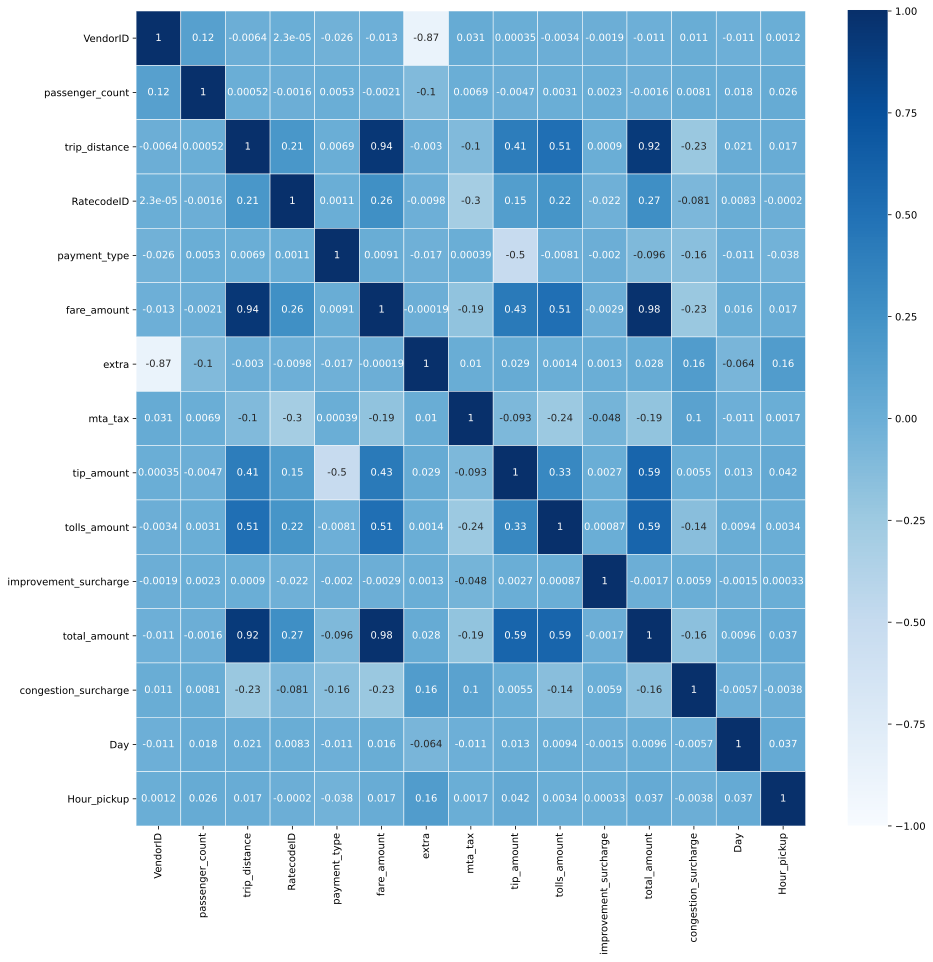

In [86]:
plt.figure(figsize =[15,15])
sns.heatmap(df1_train.corr(),cmap="Blues",annot=True, vmin=-1, vmax=1, linewidths=.5);
plt.savefig('plot15.png', dpi = 400, bbox_inches = 'tight');

# Data Visualization For Data Train

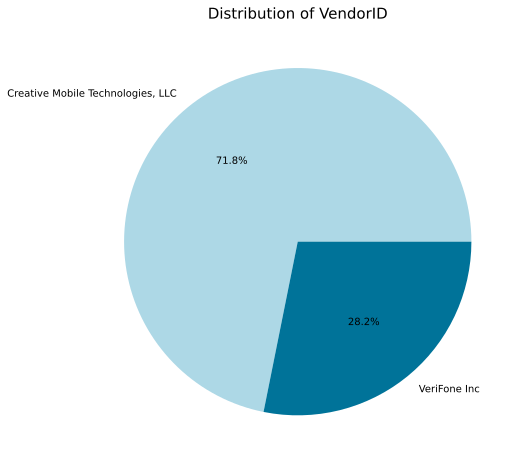

In [89]:
# visual a providers of taxi service by using a pie figure.
labels = ['Creative Mobile Technologies, LLC','VeriFone Inc']
sizes = df1_train['VendorID'].value_counts()
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%' ,colors = ['#ADD8E6','#007399'])
plt.title("Distribution of VendorID",color = 'black',fontsize = 15);

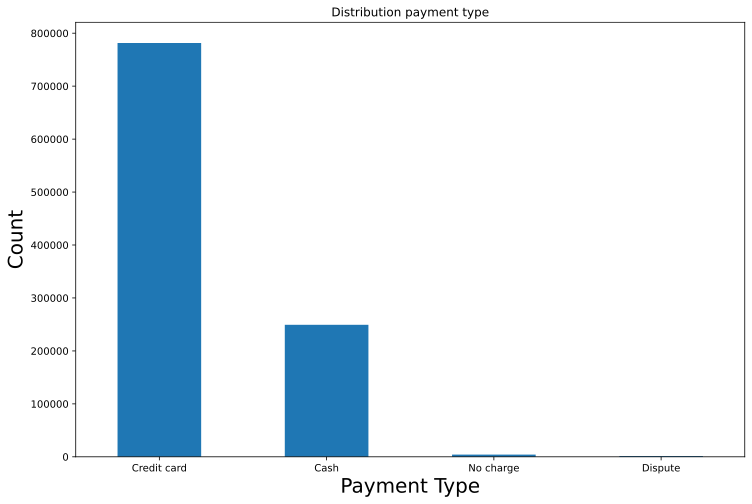

In [95]:
# to catch a distriution of payment type by using bar plot. 
labels=['Credit card','Cash','No charge','Dispute']
plt.figure(figsize=(12,8))
fig=df_train['payment_type'].value_counts().plot(kind='bar', title= 'Distribution payment type' ,  rot=0)
plt.xlabel('Payment Type',fontsize = 20);
plt.ylabel('Count',fontsize = 20);
fig.set_xticklabels(labels);

In [91]:
#df1_train.plot(kind="scatter", x="trip_distance", y="fare_amount");

In [92]:
#df1_train.plot(kind="scatter", x="fare_amount", y="tolls_amount");

In [ ]:
#df1_train.plot(kind="scatter", x="tip_amount", y="tolls_amount", alpha=0.1);

In [ ]:
#sns.pairplot(df1_train)

In [ ]:
 ##------------------ End of Code Train -----------------##

# Building and Evaluating The Model

In [ ]:
#spilt df_train to X and y

In [97]:
# select a Xs which have correlation with target in train.
X_train = df1_train.loc[:,['trip_distance', 'tip_amount', 
                       'tolls_amount', 'improvement_surcharge',
                       'congestion_surcharge']]

y_train = df1_train['fare_amount']

In [98]:
# select a Xs which have correlation with target in valdation.
X_val = df_val.loc[:,['trip_distance', 'tip_amount', 
                       'tolls_amount', 'improvement_surcharge',
                       'congestion_surcharge']]

y_val = df_val['fare_amount']

In [99]:
# build a moudel.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)

In [ ]:
# X , y = df1_train[['trip_distance','tip_amount','tolls_amount','improvement_surcharge','congestion_surcharge']], df1_train['fare_amount']

### Linear Regression Model

In [100]:
# linear regression model
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
lm.score(X_train_scaled, y_train)

0.8841731290718228

In [101]:
lm.score(X_val_scaled, y_val)

0.7026834887469096

In [141]:
#The rmse and mae for the data train in linear model.
preds_train = lm.predict(X_train_scaled)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 3.712113130073505
mean absolute error: 1.4674190777162666


In [157]:
# #The rmse and mae for the data valdition in linear model.
# preds_val = lm.predict(X_val_scaled)
# rmse = mean_squared_error(y_val, preds_val, squared=False)
# mae = mean_absolute_error(y_val, preds_val)
# print(rmse)
# print(mae)

## Model after improvement

In [102]:
df1_train['RatecodeID'] = df1_train.RatecodeID.astype('category')
df1_train['RatecodeID']

1602218    1.0
1502881    1.0
1374167    1.0
1398315    1.0
1201170    1.0
          ... 
1378371    1.0
1118566    1.0
1455407    1.0
1245787    1.0
1409311    1.0
Name: RatecodeID, Length: 363915, dtype: category
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]

In [103]:
df_dummies_train = pd.get_dummies(data=df1_train)
df_dummies_train.head()

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Day,Hour_pickup,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0
1602218,1.0,3.0,1.10,1.0,6.0,2.5,0.5,1.00,0.0,0.3,...,2.5,6,15,1,0,0,0,0,0,0
1502881,2.0,1.0,2.19,2.0,13.5,1.0,0.5,0.00,0.0,0.3,...,2.5,4,19,1,0,0,0,0,0,0
1374167,2.0,1.0,2.38,1.0,9.5,1.0,0.5,2.76,0.0,0.3,...,2.5,2,19,1,0,0,0,0,0,0
1398315,2.0,1.0,0.86,1.0,5.0,0.0,0.5,1.66,0.0,0.3,...,2.5,3,11,1,0,0,0,0,0,0
1201170,2.0,2.0,2.88,1.0,12.0,0.5,0.5,3.95,0.0,0.3,...,2.5,6,22,1,0,0,0,0,0,0


In [107]:
df_val['RatecodeID'] = df_val.RatecodeID.astype('category')
df_val['RatecodeID']

1413855    1.0
421074     1.0
935124     1.0
1704182    1.0
1164784    1.0
          ... 
542040     1.0
71889      1.0
1059358    1.0
188647     1.0
855884     1.0
Name: RatecodeID, Length: 359478, dtype: category
Categories (7, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 99.0]

In [109]:
df_dummies_val = pd.get_dummies(data=df1_val)
df_dummies_val.head()

,VendorID,passenger_count,trip_distance,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Day,Hour_pickup,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0
1413855,2.0,1.0,1.60,1.0,8.5,0.0,0.5,2.36,0.0,0.3,14.16,2.5,3,14,1,0,0,0,0,0
1704182,2.0,1.0,2.21,1.0,10.0,0.0,0.5,1.00,0.0,0.3,14.30,2.5,1,15,1,0,0,0,0,0
1164784,1.0,3.0,14.80,1.0,41.0,0.0,0.5,8.35,0.0,0.3,50.15,0.0,6,7,1,0,0,0,0,0
1365329,2.0,1.0,0.00,2.0,52.0,4.5,0.5,0.00,0.0,0.3,59.80,2.5,2,17,0,1,0,0,0,0
1171779,2.0,1.0,1.06,1.0,5.5,0.0,0.5,0.44,0.0,0.3,9.24,2.5,6,12,1,0,0,0,0,0


In [116]:
# select a Xs which have correlation with target in train.
X1_train = df_dummies_train.loc[:,['trip_distance', 'tip_amount', 
                       'tolls_amount', 'improvement_surcharge',
                       'congestion_surcharge']]

y1_train = df_dummies_train['fare_amount']

In [117]:
# select a Xs which have correlation with target in valdation.
X1_val = df_dummies_val.loc[:,['trip_distance', 'tip_amount', 
                       'tolls_amount', 'improvement_surcharge',
                       'congestion_surcharge']]

y1_val = df_dummies_val['fare_amount']

In [118]:
# build a moudel.
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train.values)
X1_val_scaled = scaler.transform(X1_val.values)

In [119]:
# linear regression model
lm = LinearRegression()
lm.fit(X1_train_scaled, y1_train)
lm.score(X1_train_scaled, y1_train)

0.8841731290718228

In [120]:
lm.score(X1_val_scaled, y_val)

0.7411670823291681

In [142]:
#The rmse and mae for the data train in linear model.
preds_train = lm.predict(X1_train_scaled)
rmse = mean_squared_error(y1_train, preds_train, squared=False)
mae = mean_absolute_error(y1_train, preds_train)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 3.712113130073505
mean absolute error: 1.4674190777162666


In [143]:
#The rmse and mae for the data valdition in linear model.
preds_val = lm.predict(X1_val_scaled)
rmse = mean_squared_error(y1_val, preds_val, squared=False)
mae = mean_absolute_error(y1_val, preds_val)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 5.368133084126585
mean absolute error: 1.802831153972283


# Polynomial Regression Model

In [130]:
poly = PolynomialFeatures(degree=2)

In [131]:
X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)

In [132]:
lm_poly = LinearRegression()

In [133]:
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Degree 2 polynomial regression train R^2: 0.891
Degree 2 polynomial regression val R^2: -2052380.527


In [139]:
#The rmse and mae for the data train in ploynomial.
preds_train = lm_poly.predict(X_train_poly)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 3.609275474439467
mean absolute error: 1.3424091467752384


In [140]:
#The rmse and mae for valdtion data in ploynomial.
preds_val = lm_poly.predict(X_val_poly)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 15116.197889040828
mean absolute error: 1097.6539350070314


# Model After Improvement

In [145]:
poly = PolynomialFeatures(degree=3)

In [146]:
X1_train_poly = poly.fit_transform(X1_train.values)
X1_val_poly = poly.transform(X1_val.values)

In [147]:
lm_poly = LinearRegression()

In [148]:
lm_poly.fit(X1_train_poly, y1_train)
print(f'Degree 2 polynomial regression train R^2: {lm_poly.score(X1_train_poly, y1_train):.3f}')
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X1_val_poly, y1_val):.3f}')

Degree 2 polynomial regression train R^2: 0.921
Degree 2 polynomial regression val R^2: -15.317


In [149]:
#The rmse and mae for the data train in ploynomial.
preds_train = lm_poly.predict(X1_train_poly)
rmse = mean_squared_error(y1_train, preds_train, squared=False)
mae = mean_absolute_error(y1_train, preds_train)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 3.056373794733742
mean absolute error: 1.2442265252573368


In [150]:
#The rmse and mae for valdtion data in ploynomial.
preds_val = lm_poly.predict(X1_val_poly)
rmse = mean_squared_error(y1_val, preds_val, squared=False)
mae = mean_absolute_error(y1_val, preds_val)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 42.62203938323711
mean absolute error: 2.1434731552313413


# Ridge Model

In [151]:
#ridge model for train data 
lm_model_ridge = Ridge(alpha =0.01)
lm_model_ridge.fit(X_train_scaled, y_train)
lm_model_ridge.score(X_train_scaled, y_train)

0.8841731290718219

In [153]:
#ridge model for validtion data 
lm_model_ridge = Ridge(alpha = 0.01)
lm_model_ridge.fit(X_train_scaled, y_train)
lm_model_ridge.score(X_val_scaled, y_val)

0.7411670838953361

In [158]:
#The rmse and mae for the data train in ridge
preds_train = lm_model_ridge.predict(X_train_scaled)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 3.7121131300735195
mean absolute error: 1.467419144738472


In [161]:
#The rmse and mae for the data valdition in ridge
preds_val = lm_model_ridge.predict(X1_val_scaled)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 5.368133067885609
mean absolute error: 1.8028312168218474


# Lasso Model

In [163]:
#lasso model for train data 
lm_model_lasso = Lasso(alpha = 0.01)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_train, y_train)

0.884156526081727

In [164]:
#lasso model for valdtion data 
lm_model_lasso = Lasso(alpha = 0.01)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_val, y_val)

0.7857798919302372

In [165]:
#The rmse and mae for the data train in lasso
preds_train = lm_model_lasso.predict(X_train)
rmse = mean_squared_error(y_train, preds_train, squared=False)
mae = mean_absolute_error(y_train, preds_train)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 3.712379173559613
mean absolute error: 1.4652827154508092


In [166]:
#The rmse and mae for the data validition in lasso 
preds_val = lm_model_lasso.predict(X_val)
rmse = mean_squared_error(y_val, preds_val, squared=False)
mae = mean_absolute_error(y_val, preds_val)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 4.883639943503903
mean absolute error: 1.7094249434267366


In [ ]:
#--------------------- test -----------------

# Modeling for Test 

In [185]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135777 entries, 1121699 to 1501070
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   VendorID               135777 non-null  float64 
 1   passenger_count        135777 non-null  float64 
 2   trip_distance          135777 non-null  float64 
 3   RatecodeID             135777 non-null  category
 4   payment_type           135777 non-null  float64 
 5   fare_amount            135777 non-null  float64 
 6   extra                  135777 non-null  float64 
 7   mta_tax                135777 non-null  float64 
 8   tip_amount             135777 non-null  float64 
 9   tolls_amount           135777 non-null  float64 
 10  improvement_surcharge  135777 non-null  float64 
 11  total_amount           135777 non-null  float64 
 12  congestion_surcharge   135777 non-null  float64 
 13  Day                    135777 non-null  int64   
 14  Hour_pickup  

In [186]:
# df1_test['RatecodeID'] = df1_test.RatecodeID.astype('category')
# df1_test['RatecodeID']

In [187]:
# df_dummies_test = pd.get_dummies(data=df1_test)
# df_dummies_test.head()

In [188]:
X_test = df1_test.loc[:,['trip_distance', 'tip_amount', 
                       'tolls_amount', 'improvement_surcharge',
                       'congestion_surcharge']]

y_test = df1_test['fare_amount']

In [189]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

# Linear Regression Model Test

In [190]:
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)
lm.score(X_test_scaled, y_test)

0.1686776895472364

In [191]:
#The rmse and mae for the data test in linear model.
preds_test = lm.predict(X_test_scaled)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 17.6044212060201
mean absolute error: 1.840871189045124


# Polynomial Model Test

In [199]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)
lm_poly = LinearRegression()
lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Degree 2 polynomial regression test R^2: -594386.508


In [193]:
#The rmse and mae for the data test in ploynomial.
preds_test = lm_poly.predict(X_test_poly)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 14885.789380499948
mean absolute error: 1045.3874552592183


# Ridge Model Test

In [194]:
lm_model_ridge = Ridge(alpha = 0.01)
lm_model_ridge.fit(X_train_scaled, y_train)
lm_model_ridge.score(X_test_scaled, y_test)

0.168677693627593

In [195]:
#The rmse and mae for the data test in ridge.
preds_test = lm_model_ridge.predict(X_test_scaled)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 17.60442116281645
mean absolute error: 1.8408712517405825


# Lasso Model Test

In [197]:
#lasso model for valdtion data 
lm_model_lasso = Lasso(alpha = 0.01)
lm_model_lasso.fit(X_train, y_train)
lm_model_lasso.score(X_test, y_test)

0.18178560585655945

In [198]:
#The rmse and mae for the data test in lasso.
preds_test = lm_model_lasso.predict(X_test)
rmse = mean_squared_error(y_test, preds_test, squared=False)
mae = mean_absolute_error(y_test, preds_test)
print('mean squared error :',rmse)
print('mean absolute error:',mae)

mean squared error : 17.465080460033374
mean absolute error: 1.7531430269058217
